In [160]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import WranglerFunctions as wf

In [217]:
RIO = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/RIO_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
EVR = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/EVR_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
ANTO = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/ANTO_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
AAL = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/AAL_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')
GLEN = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/GLEN_LN_BBG_GAAP.csv', index_col = False, encoding = 'unicode_escape')
BHP = pd.read_csv('../Datasets/Financial_dataset/IncomeStatements/BHP_LN_BBG_GAAP.csv', index_col = False, encoding= 'unicode_escape')

In [218]:
def CostsWrangler(df, start_str):
    #Setting columns as the dates
    df.columns = df.loc[3].values
    #Getting rid of spaces in front of string
    df['12 Months Ending'] = df['12 Months Ending'].str.strip()
    #Removing nan columns
    df = df.loc[:, df.columns.notna()]
    
    # Removing unneccessary rows
    df = df.drop([0, 1, 2, 3, len(df) - 1], axis = 0)
    df = df.reset_index(drop = True)
    
    # Get revenue index
    rev_idx = df['12 Months Ending'][df['12 Months Ending'] == start_str].index[0]
    
    # Some float values have commas separating thousands - creates problems when converting to float
    df = df.replace(',','', regex=True)
    
    # Replace the + and - characters
    df = df.replace('\+ ','', regex=True)
    df = df.replace('- ','', regex=True)
    
    # Putting dates as rows now
    df = df.T
    
    # Columns as countries
    df.columns = df.loc['12 Months Ending']
    
    # Only selecting relevant columns
    df = df.iloc[:, rev_idx:]
    
    df = df.drop(['12 Months Ending'], axis = 0)
    
    # Converting values to float
#     for column in df.columns:
    df.columns
    df['Operating Expenses'] = df['Operating Expenses'].astype(float)    
                
    # Missing data as 0.0 - not 100% necessary
    df = df.replace(np.nan, 0.0)
    
    # Date as datetime format
    df = df.reset_index()
    df = df.rename(columns = {"index" : "Date"})
    
    print(wf.format_date(df, 'Date', '%m/%d/%Y'))
    df.index = df['Date']
    
    df = df.drop('Date', axis = 1)
    
#     Only using data from 2010    
    df = df[(df.index > '2010-01-01') & (df.index <'2022-01-01')]
    
    return df

RIO = CostsWrangler(RIO, 'Revenue')
EVR = CostsWrangler(EVR, 'Revenue')
ANTO = CostsWrangler(ANTO, 'Revenue')
AAL = CostsWrangler(AAL, 'Revenue')
GLEN = CostsWrangler(GLEN, 'Revenue')
BHP = CostsWrangler(BHP, 'Revenue')

0
0
0
0
0
0


In [166]:
BHP

12 Months Ending,Revenue,Sales & Services Revenue,Cost of Revenue,Gross Profit,Other Operating Income,Operating Expenses,Research & Development,Depreciation & Amortization,Prov For Doubtful Accts,Other Operating Expense,...,Operating Margin,Profit Margin,Current Profit,Sales per Employee,Dividends per Share,Total Cash Common Dividends,Capitalized Interest Expense,Personnel Expenses,Depreciation Expense,Rental Expense
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-30,33442.5,33442.5,,,324.3,21018.3,41.2,3014.4,,17962.7,...,38.12,24.10,,845148.00,0.55,3066.3,190.7,,2997.3,247.0
2011-06-30,45122.4,45122.4,,,326.4,24769.3,46.5,3169.4,,21553.3,...,45.83,32.96,,1107100.00,0.64,3468.2,161.0,3333.0,3146.8,283.7
2012-06-30,45609.8,45609.8,,,556.3,31407.0,47.4,4046.6,,27313.1,...,32.36,21.35,,983605.81,0.71,3787.0,198.3,4207.6,3980.9,401.0
2013-06-30,42063.5,42063.5,,,2507.1,32095.6,40.8,4484.2,,27570.6,...,29.66,17.02,,897028.99,0.74,3933.2,185.0,9143.2,4350.3,494.9
2014-06-30,34936.7,34936.7,,,745.4,22376.3,16.6,4749.2,,17610.6,...,38.09,24.37,,1109000.00,0.74,3966.3,112.0,3331.7,4590.4,409.3
2015-06-30,28380.4,28380.4,,,304.6,23829.9,8.3,5822.8,,17998.8,...,17.11,4.28,,956535.47,0.79,4195.8,94.1,3160.7,5668.3,404.4
2016-06-30,19282.5,19282.5,,,291.6,16364.5,0.0,4191.7,,12172.8,...,16.65,-22.35,,718773.46,0.20,1080.7,83.0,2433.4,4042.5,251.1
2017-06-30,28194.0,28194.0,,,522.2,18946.1,0.0,4878.3,,14067.8,...,34.65,16.48,,1078300.00,0.65,3486.0,89.1,2914.1,4711.1,308.4
2018-06-30,32047.3,32047.3,,,183.5,20454.1,0.0,4672.3,,15781.8,...,36.75,8.59,,1179900.00,0.88,8503.5,103.3,2964.8,4526.0,312.8


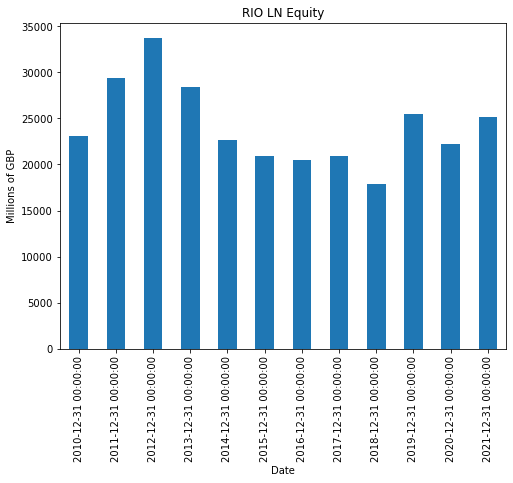

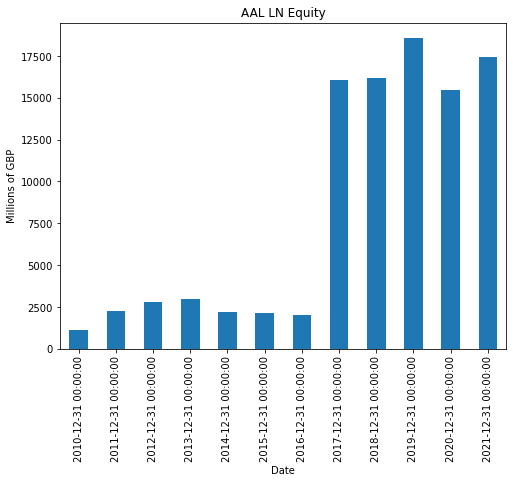

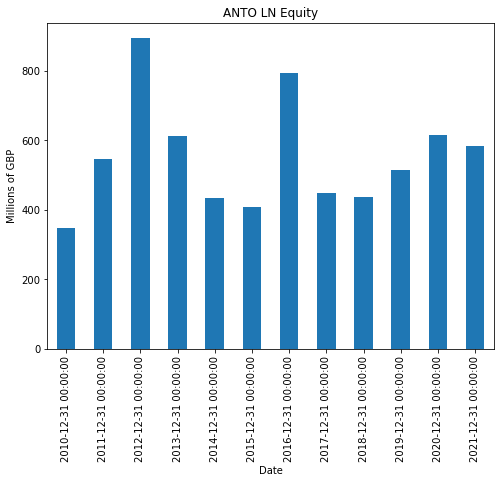

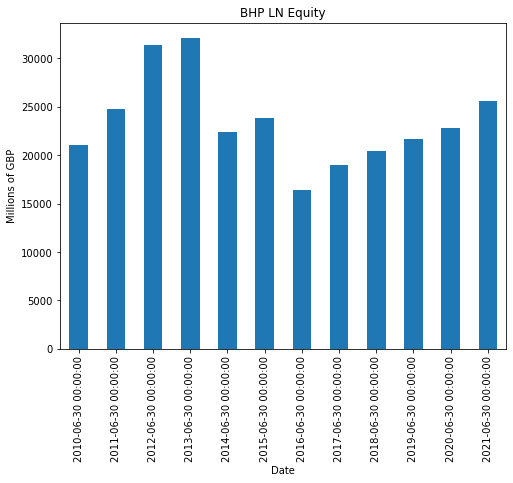

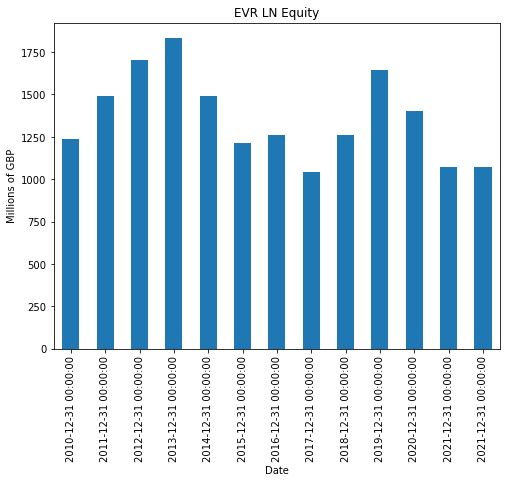

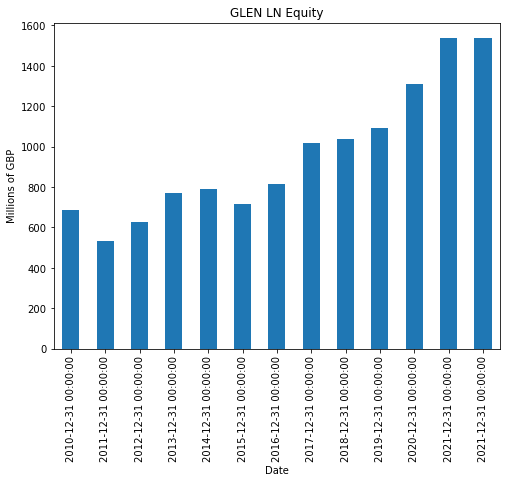

In [216]:
def plotCosts(dataset, name):
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.bar(dataset.index.values, dataset['Operating Expenses'].values)
    ax = dataset['Operating Expenses'].plot(kind="bar")
    ax.set_ylabel("Millions of GBP")
    ax.set_title(name)
    plt.show()

datasets = {'RIO LN Equity': RIO, 'AAL LN Equity': AAL, 'ANTO LN Equity': ANTO, 'BHP LN Equity': BHP, 'EVR LN Equity': EVR, 'GLEN LN Equity': GLEN}

for key, value in datasets.items():
    plotCosts(value, key)